# MAT 381E Homework 3

## Question 1

1. Using the library [Beautiful Soup](https://pypi.org/project/beautifulsoup4/) write a function that takes a URL from a specific Turkish Newspaper (any newspaper you'd like) and extracts and then returns the text (not the HTML source) of the news article given in the URL. (Warning: you cannot write a universal function that works for every newspaper. The function has to be specific to a specific newspaper.)

2. Write a separate function that cleans the text and removes all Turkish stopwords for a text coming from Step 1.

3. Display word clouds of 5 news articles after you apply the functions in Step 1 and Step 2.

In [2]:
import numpy as np
import pandas as pd
from urllib.request import Request, urlopen
!pip install nltk
!pip install tweepy
import nltk
nltk.download('stopwords')
import tweepy
import regex as re
import requests
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopandas
import geopandas as gpd
!pip install folium
#!pip imstall mpl_toolkits.basemap
#from mpl_toolkits.basemap import Basemap 

from collections import Counter
!pip install xmltodict
!pip install wordcloud
from xmltodict import parse
from bs4 import BeautifulSoup
from snowballstemmer import TurkishStemmer
from wordcloud import WordCloud
from  nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ecemnur.erman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [4]:
#QUESTION 1
def news_getter(htmllink):
    with requests.get(htmllink) as link:
        raw_html = BeautifulSoup(link.content,'html.parser')
        text = raw_html.find('div', attrs={'class':"row mb-4"}).text
    return text

In [5]:
def text_cleaner(text):
    our_data = re.sub(r'[^\w\s]','',text.lower()).split()
    stemmer = TurkishStemmer()
    cleaned = stemmer.stemWords(our_data)
    res = Counter(cleaned)
    dict(sorted(res.items(), key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(12,12))
    cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
    return plt.imshow(cloud.generate(' '.join(cleaned)))

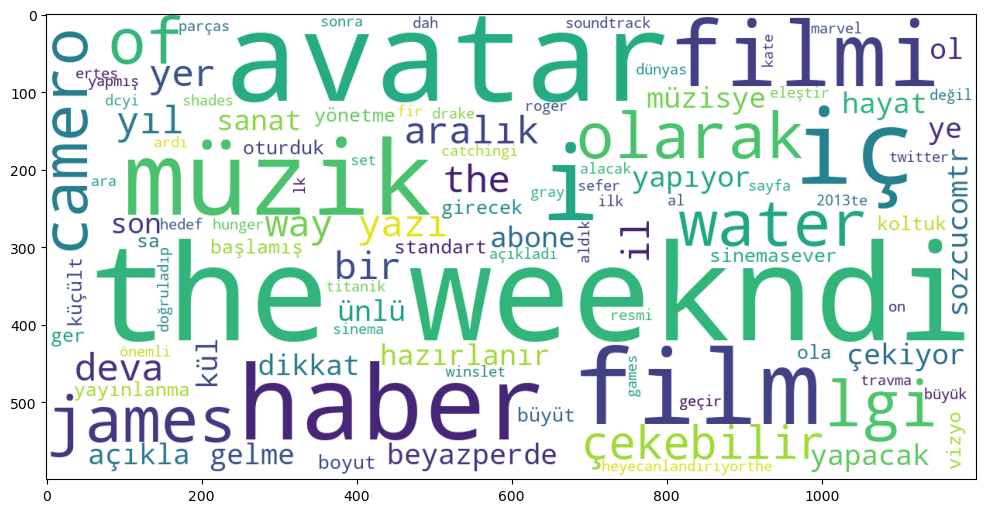

In [6]:
news1 = news_getter('https://www.sozcu.com.tr/hayatim/kultur-sanat-haberleri/the-weeknd-avatar-2-icin-muzik-yapiyor/')
text_cleaner(news1)

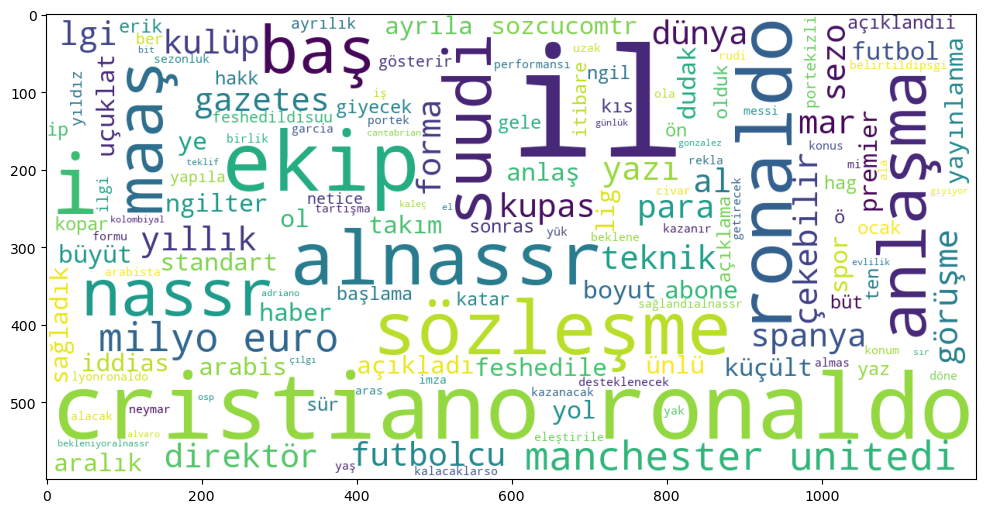

In [7]:
news2 = news_getter('https://www.sozcu.com.tr/spor/dunyadan-spor/cristiano-ronaldo-al-nassr-ile-anlasti-iddiasi-yillik-maasi-dudak-ucuklatti-7518585/')
text_cleaner(news2)

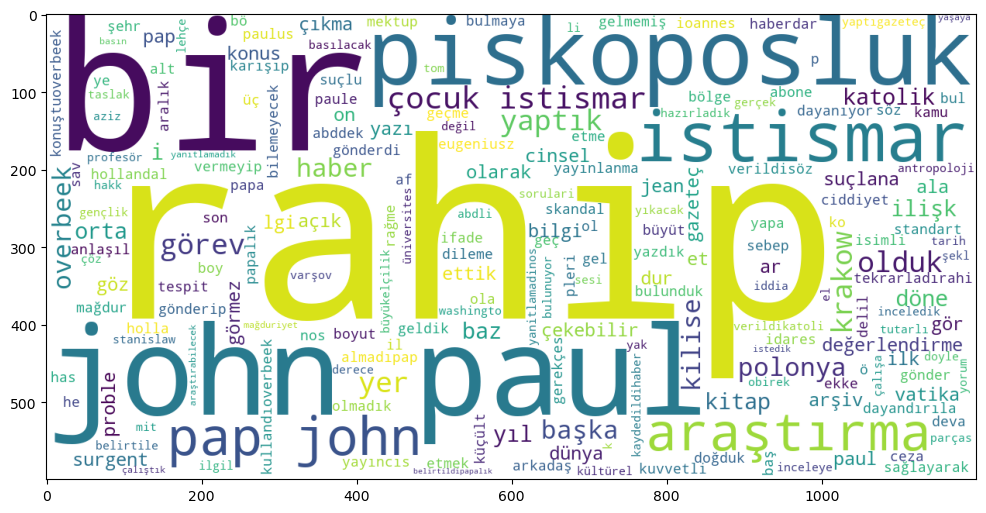

In [8]:
news3 = news_getter('https://www.sozcu.com.tr/2022/dunya/papa-2-john-paul-rahiplerin-cocuk-istismarini-gormezden-gelmis-7517203/')
text_cleaner(news3)

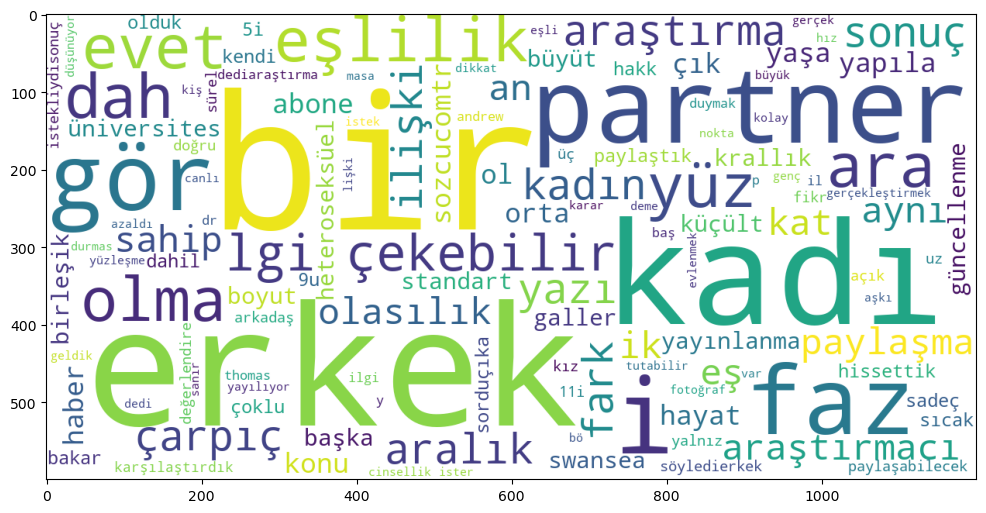

In [9]:
news4 = news_getter('https://www.sozcu.com.tr/hayatim/yasam-haberleri/cok-eslilik-arastirmasinda-carpici-sonuclar/')
text_cleaner(news4)

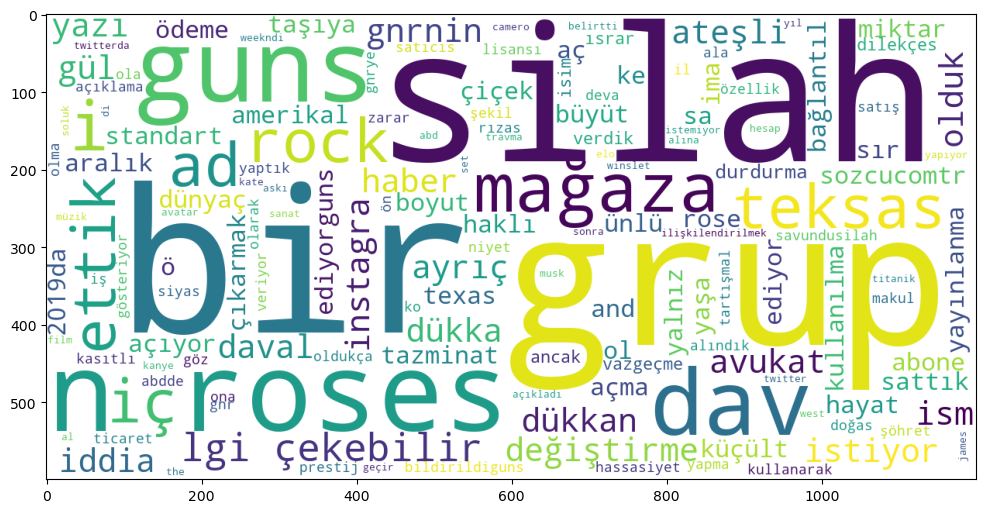

In [10]:
news5 = news_getter('https://www.sozcu.com.tr/hayatim/yasam-haberleri/guns-n-roses-teksastaki-bir-silah-dukkanina-dava-acti/')
text_cleaner(news5)

## Question 2

1. Using the library [tweepy](https://docs.tweepy.org/en/stable/index.html) pull 5000 tweets (in English) on any topic you'd like.

2. Clean the text and remove all stopwords. Then sketch a word cloud of your collection.

2. Using the library [NLTK](https://www.nltk.org/) apply sentiment analysis on the tweets you collected. 

3. Analyze your results.

In [11]:
#QUESTION 2
consumer_key = "Wc5k2nbYJszGz5Gy8GOq1PWV3" 
consumer_secret = "dR4CvkiBpBOzTiws0PWwr1yoJeme7Wt5KaMA5S8Fv1ldvZiXHa"
access_key = "1468583570415525892-v4CFZIqW6pafJgXIcwklBYbzV5kKzj";
access_secret = "8WSZJKiotLdWJvDb1ipBUSY46KMXWwHhjcQtLLuLLCY67"

In [16]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

search_query = "#covid19 -filter:retweets"
tweets = tweepy.Cursor(api.search_tweets,
              q=search_query,
              lang="en",
              since="2020-09-16").items(50)
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

#keyword = "marvel"
#limit=300

#tweets = tweepy.Cursor(api.search_tweets(q=keyword, lang = "eng")).items(limit)

AttributeError: 'API' object has no attribute 'search_tweets'

In [23]:
type(API)

NameError: name 'API' is not defined

## Question 3

For this question use [UFO Sightings Dataset](https://www.kaggle.com/code/hakeemtfrank/ufo-sightings-data-exploration/data) from Kaggle.

1. Ingest the dataset as a pandas dataframe, and clean it if necessary.

2. Plot a geographic heatmap of UFO sightings and find hotspots.

3. Is there a statistically verifiable correlation between shape of the UFO and the duration of the sighting. Investigate.

In [5]:
!pip install opendatasets
import opendatasets as od

In [6]:
od.download("https://www.kaggle.com/datasets/NUFORC/ufo-sightings/versions/1?resource=download")

Skipping, found downloaded files in "./ufo-sightings" (use force=True to force download)


In [7]:
#QUESTION 3
import os
directory2 = os.path.join('/Users', 'ecemnur.erman', 'Desktop', 'complete.csv')
raw_ufodata = pd.read_csv(directory2, on_bad_lines='skip')
raw_ufodata.head()

/var/folders/f9/v1tjkrz90_34ny97w2kbrd9w0000gq/T/ipykernel_5261/4001332564.py:4: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_ufodata = pd.read_csv(directory2, on_bad_lines='skip')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [8]:
ufodata = raw_ufodata[['city', 'country', 'latitude','longitude', 'shape']]

In [22]:
plt.figure(figsize=(20,12))
m = Basemap(projection='merc',
           llcrnrlat=-90,
           urcrnrlat=90,
           llcrnrlon=-180,
           urcrnrlon=180,
           resolution='i')
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='wheat', ocean_color='lightblue')

xs,ys = m(raw_ufodata['longitude'], raw_ufodata['latitude'])
m.scatter(xs, ys, c='red', s=200, alpha=0.5)

plt.title("UFO Sightings", fontdict={"fontsize": 15}, pad=5);

NameError: name 'Basemap' is not defined

<Figure size 2000x1200 with 0 Axes>

In [14]:
shapes = set(raw_ufodata['shape'])
shapes

{'changed',
 'changing',
 'chevron',
 'cigar',
 'circle',
 'cone',
 'crescent',
 'cross',
 'cylinder',
 'delta',
 'diamond',
 'disk',
 'dome',
 'egg',
 'fireball',
 'flare',
 'flash',
 'formation',
 'hexagon',
 'light',
 nan,
 'other',
 'oval',
 'pyramid',
 'rectangle',
 'round',
 'sphere',
 'teardrop',
 'triangle',
 'unknown'}

In [2]:
import math
for value in set(raw_ufodata['shape']):
    if (value == "nan"):
        raw_ufodata.replace(np.nan,'',regex=True)
        
        
newdf = [ufodata['shape'].value_counts()[value] for value in shapes]



NameError: name 'raw_ufodata' is not defined

## Question 4

For this question use [Turkish Institute of Statistics (TÜİK)](https://data.tuik.gov.tr/) data portal, and [The Humanitarian Data Exchange (HDX)](https://www.eea.europa.eu/data-and-maps/data/) data portal.

1. Get the population data for cities in Turkey as a pandas data frame from TUIK. Notice that TUIK generates the data only for human consumption. Clean the data and get well-defined columns and rows that contain only the data removing all unnecessary metadata (keep the column names). Cleaning must be done using python only. You are NOT allowed to clean it externally.

2. Get the crime statistics (Suçun İşlendiği İl ve Suç Türüne Göre Ceza İnfaz Kurumundan Çıkan Hükümlüler) as a pandas data frame from TUIK. Clean the data and get well-defined columns and rows that contain only the data removing all unnecessary metadata (keep the column names). Cleaning must be done python only. You are NOT allowed to clean it externally.

3. Get the shape files for the Turkish city municipality borders from HDX, ingest it as a geoPandas datafroma, and then clean it if necessary. Cleaning must be done using python only. You are NOT allowed to clean it externally.

4. Merge the population data, crime data, and the shapefile data into a single geoPandas dataframe.

5. Plot the population data as a choropleth map as I did in the class.

6. Plot the crime data for different categories. However, don't use the raw numbers. Use the normalized data with respect to the population of the city.